In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import opendatasets as od

In [2]:
od.download("https://www.kaggle.com/datasets/nitishjolly/consumers-buying-behavior")

Dataset URL: https://www.kaggle.com/datasets/nitishjolly/consumers-buying-behavior


100%|██████████| 1.41k/1.41k [00:00<00:00, 92.8kB/s]

In [3]:
file=('.\consumers-buying-behavior/\social_ads.csv')
df=pd.read_csv(file)

<>:1: SyntaxWarning: invalid escape sequence '\c'
<>:1: SyntaxWarning: invalid escape sequence '\c'
C:\Users\admin\AppData\Local\Temp\ipykernel_3508\233192415.py:1: SyntaxWarning: invalid escape sequence '\c'
  file=('.\consumers-buying-behavior/\social_ads.csv')
C:\Users\admin\AppData\Local\Temp\ipykernel_3508\233192415.py:1: SyntaxWarning: invalid escape sequence '\c'
  file=('.\consumers-buying-behavior/\social_ads.csv')


FileNotFoundError: [Errno 2] No such file or directory: '.\\consumers-buying-behavior/\\social_ads.csv'

In [4]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [6]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


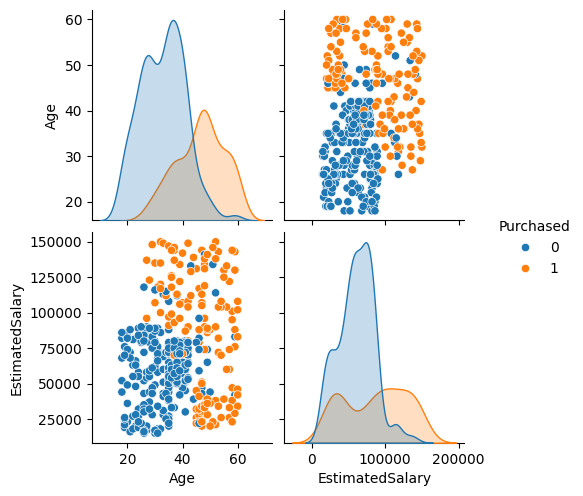

In [7]:
import seaborn as sns
sns.pairplot(df,hue='Purchased')
plt.show()

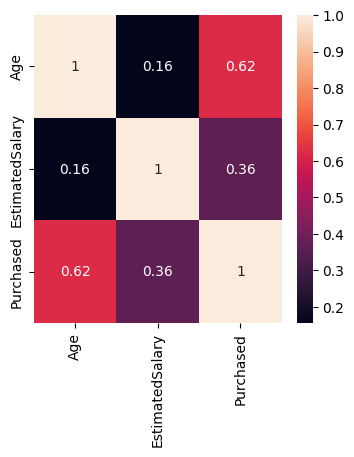

In [8]:
plt.figure(figsize=(4,4))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [10]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=24)

In [12]:
y_train

298    0
23     1
271    1
84     0
281    0
      ..
129    0
145    0
343    1
192    0
387    0
Name: Purchased, Length: 300, dtype: int64

In [13]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [14]:
y_pred=model.predict(x_test)

In [15]:
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [16]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91        72
           1       0.74      0.82      0.78        28

    accuracy                           0.87       100
   macro avg       0.83      0.86      0.84       100
weighted avg       0.88      0.87      0.87       100



In [17]:
from sklearn.ensemble import RandomForestClassifier
model_2=RandomForestClassifier(criterion='entropy')

In [18]:
model_2.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy')

In [19]:
pred_2=model_2.predict(x_test)

In [20]:
pred_2

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
print(accuracy_score(y_test,y_pred))

0.87


In [23]:
print(accuracy_score(y_test,pred_2))

0.9


In [24]:
print(classification_report(pred_2,y_test))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93        73
           1       0.77      0.89      0.83        27

    accuracy                           0.90       100
   macro avg       0.87      0.90      0.88       100
weighted avg       0.91      0.90      0.90       100

